IMPORTING THE LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pickle
import math
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
startup_df=pd.read_csv('/content/startup.csv')
startup_df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


DATA EXPLORATION

In [5]:
startup_df.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,...,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,...,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [6]:
startup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

DISPLAYING ALL THE COLUMNS

In [7]:
startup_df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

In [8]:
startup_df['status'].value_counts()

acquired    597
closed      326
Name: status, dtype: int64

DISPLAYING THE CATEGORICAL OR OBJECT COLUMNS

In [9]:
category_df=startup_df.select_dtypes(include='object')
category_df.head()

,state_code,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,state_code.1,category_code,object_id,status
0,CA,92101,c:6669,San Diego,NaN,Bandsintown,1/1/2007,NaN,4/1/2009,1/1/2010,CA,music,c:6669,acquired
1,CA,95032,c:16283,Los Gatos,NaN,TriCipher,1/1/2000,NaN,2/14/2005,12/28/2009,CA,enterprise,c:16283,acquired
2,CA,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,NaN,3/30/2010,3/30/2010,CA,web,c:65620,acquired
3,CA,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,NaN,2/17/2005,4/25/2007,CA,software,c:42668,acquired
4,CA,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,CA,games_video,c:65806,closed


CHANGING THE STATUS COLUMN FROM OBJECT TO NUMERIC

In [10]:
startup_df['status'] = startup_df.status.replace({'acquired':1, 'closed':0})
startup_df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,0


COORELATION BETWEEN THE COLUMNS IN THE DATASET

In [11]:
startup_df.corr(method ='pearson')

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
Unnamed: 0,1.000000,0.054726,0.023292,-0.068721,-0.004507,-0.116533,-0.135614,-0.131698,-0.079950,-0.118456,...,0.006243,-0.040057,0.134044,-0.076568,-0.135289,-0.090922,-0.081123,0.026713,0.026019,-0.068721
latitude,0.054726,1.000000,0.368475,0.046560,-0.046868,-0.041692,-0.072000,-0.054275,-0.039198,-0.000659,...,-0.039656,0.031045,0.028891,-0.033072,-0.011801,-0.057762,-0.018825,-0.018176,0.032675,0.046560
longitude,0.023292,0.368475,1.000000,-0.036092,-0.014158,-0.000148,-0.051674,-0.087701,-0.073197,0.022447,...,-0.046560,0.024852,0.102001,-0.066288,-0.067017,-0.042309,-0.042854,-0.045191,-0.091913,-0.036092
labels,-0.068721,0.046560,-0.036092,1.000000,-0.075637,0.073731,0.162279,0.265871,0.360434,0.206049,...,-0.042408,-0.056515,-0.072840,0.184307,0.208257,0.165902,0.139940,0.185992,0.310652,1.000000
age_first_funding_year,-0.004507,-0.046868,-0.014158,-0.075637,1.000000,0.762382,0.593526,0.472029,-0.187817,-0.155478,...,0.115649,0.168140,-0.345985,-0.293081,-0.060532,0.033388,0.121338,0.114363,0.050638,-0.075637
age_last_funding_year,-0.116533,-0.041692,-0.000148,0.073731,0.762382,1.000000,0.687515,0.632099,0.073080,0.385999,...,0.091918,0.351044,-0.354470,-0.099762,0.258928,0.317469,0.312340,0.122893,0.200727,0.073731
age_first_milestone_year,-0.135614,-0.072000,-0.051674,0.162279,0.593526,0.687515,1.000000,0.777484,0.245364,0.195207,...,0.031647,0.109566,-0.278960,0.014977,0.190824,0.209076,0.253121,0.055704,0.155329,0.162279
age_last_milestone_year,-0.131698,-0.054275,-0.087701,0.265871,0.472029,0.632099,0.777484,1.000000,0.348534,0.262056,...,-0.001843,0.089589,-0.249427,0.113306,0.261767,0.278814,0.252636,0.083480,0.206859,0.265871
relationships,-0.079950,-0.039198,-0.073197,0.360434,-0.187817,0.073080,0.245364,0.348534,1.000000,0.358883,...,-0.073963,-0.028938,-0.060625,0.317130,0.285015,0.259842,0.207488,0.115061,0.222207,0.360434
funding_rounds,-0.118456,-0.000659,0.022447,0.206049,-0.155478,0.385999,0.195207,0.262056,0.358883,1.000000,...,-0.012769,0.334832,0.010606,0.260598,0.444454,0.440923,0.323620,0.043044,0.259345,0.206049


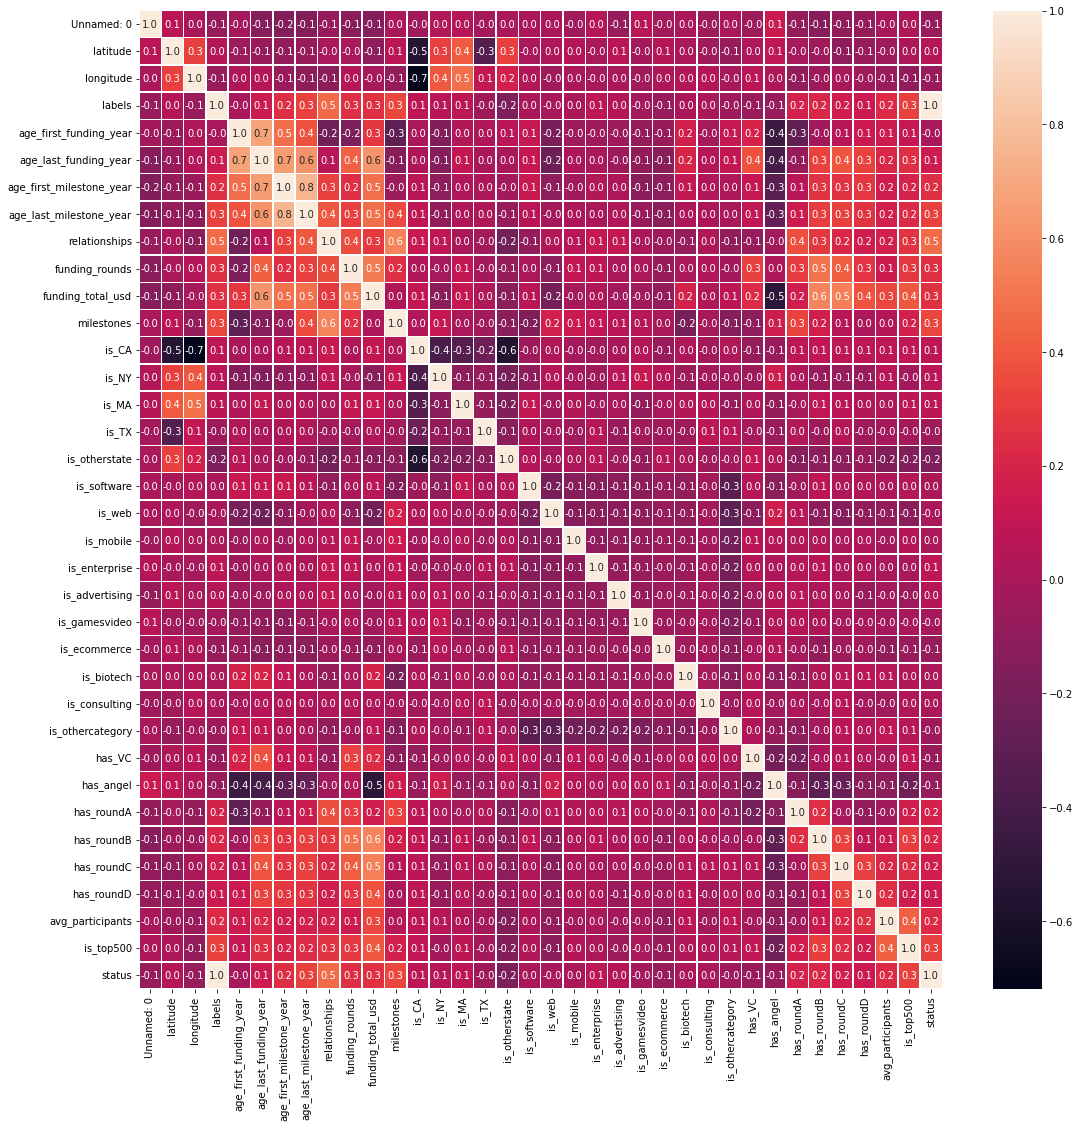

In [12]:
f, ax = plt.subplots(figsize = (18, 18))
    
heatmap = startup_df.corr(method='spearman')
    
sns.heatmap(heatmap, annot = True, linewidth = 0.5, fmt = '.1f', ax = ax)
plt.show()

CHECKING FOR NULL VALUES

In [13]:
startup_df.isnull().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [14]:
print("Percentage of missing values in 'closed_at' :  {:.0f}%". format((startup_df.closed_at.isnull().sum())/len(startup_df)*100))
print("Percentage of missing values in 'Unnamed: 6': {:.0f}%". format((startup_df["Unnamed: 6"].isnull().sum())/len(startup_df)*100))

Percentage of missing values in 'closed_at' :  64%
Percentage of missing values in 'Unnamed: 6': 53%


In [15]:
startup_df["status"].value_counts()

1    597
0    326
Name: status, dtype: int64

Among the 923 startups only 597 are acquired and others are all closed.

Text(0.5, 1.0, 'Startup Acquired')

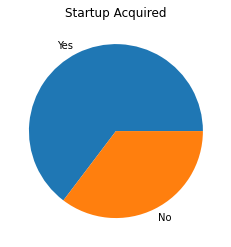

In [16]:
fig, ax = plt.subplots()
ax.pie(x=startup_df["status"].value_counts(), labels=['Yes', 'No'],)
ax.set_title('Startup Acquired')

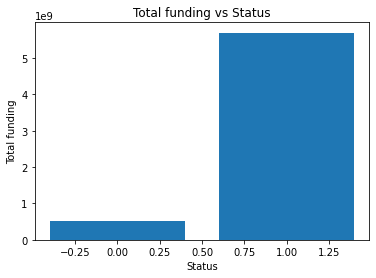

In [17]:
plt.bar(startup_df["status"],startup_df["funding_total_usd"])
plt.title('Total funding vs Status')
plt.xlabel('Status')
plt.ylabel('Total funding')
plt.show()

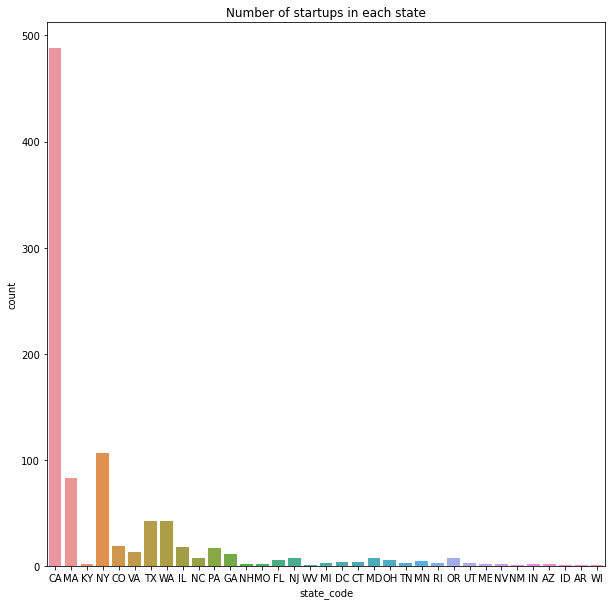

In [18]:
plt.figure(figsize=(10,10))
plt.title("Number of startups in each state")
sns.countplot(x=startup_df["state_code"]);

California has the largest number of startups

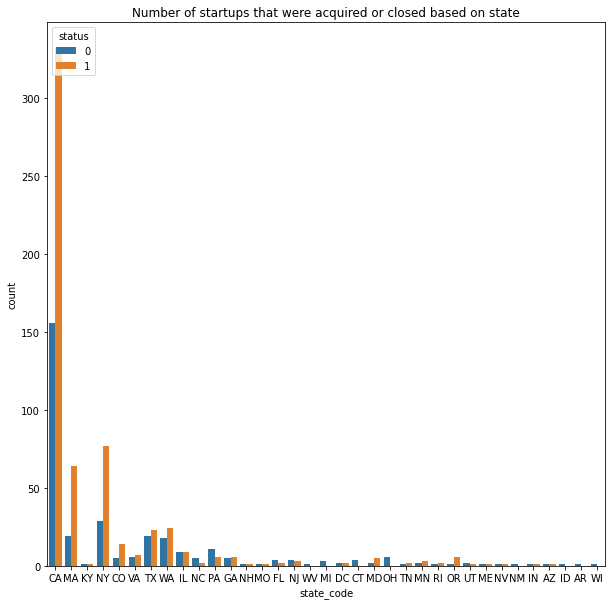

In [19]:
plt.figure(figsize=(10,10))
plt.title("Number of startups that were acquired or closed based on state")
sns.countplot(x=startup_df["state_code"],hue=startup_df["status"]);

According to the above graph we can see that the number of  startups in the california are more and also the startups in california have became a successs


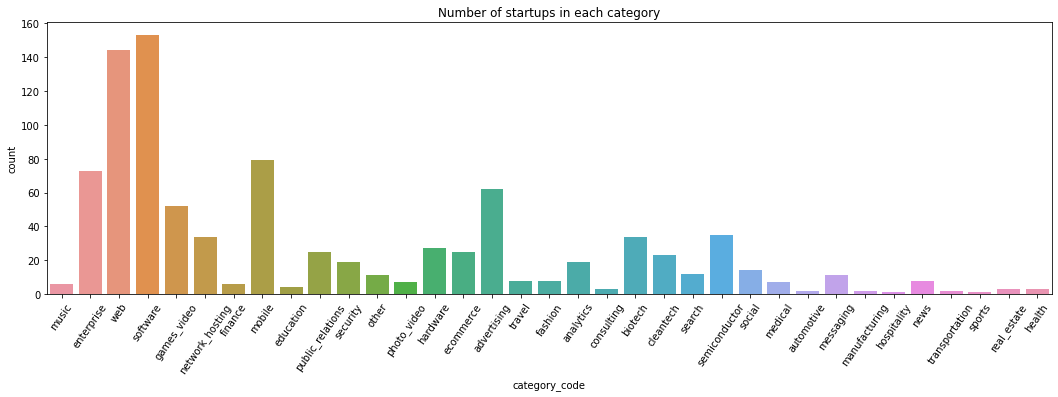

In [20]:
plt.figure(figsize=(18,5))
plt.xticks(rotation=55)
plt.title("Number of startups in each category")
sns.countplot(startup_df["category_code"]);

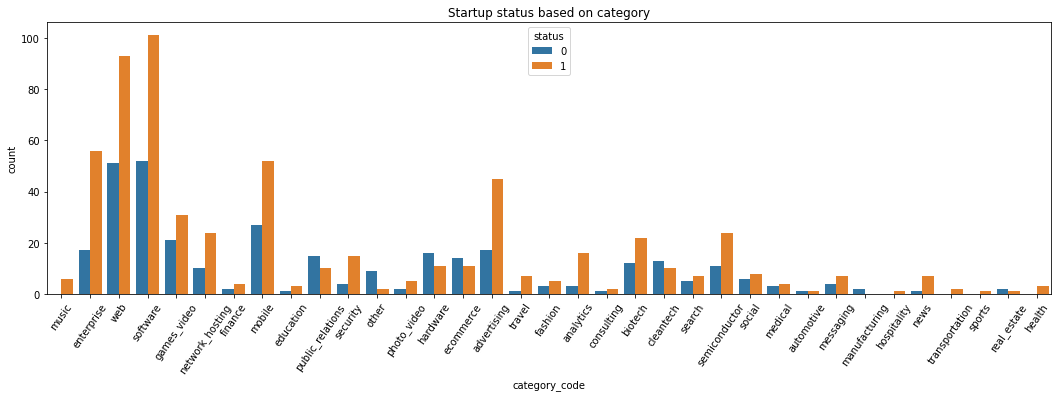

In [21]:
plt.figure(figsize=(18,5))
plt.xticks(rotation=55)
plt.title("Startup status based on category")
sns.countplot(x=startup_df["category_code"], hue=startup_df["status"]);

In [22]:
startup_df.funding_rounds.value_counts()

1     317
2     280
3     167
4      90
5      40
7      13
6      13
8       2
10      1
Name: funding_rounds, dtype: int64

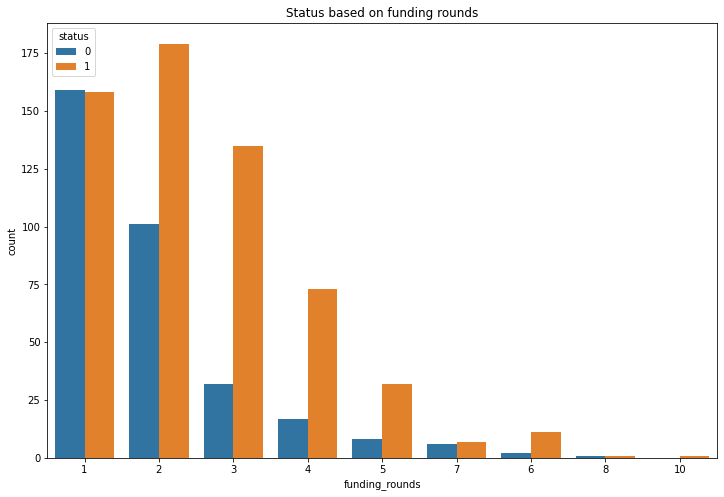

In [23]:
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Status based on funding rounds")
sns.countplot(x="funding_rounds", hue="status", data=startup_df,
              order=startup_df.funding_rounds.value_counts().index)

DATA CLEANING

Checking duplicate rows


In [24]:
startup_df.duplicated(keep='first').sum()


0

Removing irrelevant columns


In [25]:
startup_df = startup_df.drop(["Unnamed: 0", "Unnamed: 6", "labels","closed_at", "id"], axis=1)


In [26]:
startup_df.head()

,state_code,latitude,longitude,zip_code,city,name,founded_at,first_funding_at,last_funding_at,age_first_funding_year,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,92101,San Diego,Bandsintown,1/1/2007,4/1/2009,1/1/2010,2.2493,...,c:6669,0,1,0,0,0,0,1.0000,0,1
1,CA,37.238916,-121.973718,95032,Los Gatos,TriCipher,1/1/2000,2/14/2005,12/28/2009,5.1260,...,c:16283,1,0,0,1,1,1,4.7500,1,1
2,CA,32.901049,-117.192656,92121,San Diego,Plixi,3/18/2009,3/30/2010,3/30/2010,1.0329,...,c:65620,0,0,1,0,0,0,4.0000,1,1
3,CA,37.320309,-122.050040,95014,Cupertino,Solidcore Systems,1/1/2002,2/17/2005,4/25/2007,3.1315,...,c:42668,0,0,0,1,1,1,3.3333,1,1
4,CA,37.779281,-122.419236,94105,San Francisco,Inhale Digital,8/1/2010,8/1/2010,4/1/2012,0.0000,...,c:65806,1,1,0,0,0,0,1.0000,1,0


Replacing NaN values with zero.

In [27]:
startup_df.fillna(0)

,state_code,latitude,longitude,zip_code,city,name,founded_at,first_funding_at,last_funding_at,age_first_funding_year,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,92101,San Diego,Bandsintown,1/1/2007,4/1/2009,1/1/2010,2.2493,...,c:6669,0,1,0,0,0,0,1.0000,0,1
1,CA,37.238916,-121.973718,95032,Los Gatos,TriCipher,1/1/2000,2/14/2005,12/28/2009,5.1260,...,c:16283,1,0,0,1,1,1,4.7500,1,1
2,CA,32.901049,-117.192656,92121,San Diego,Plixi,3/18/2009,3/30/2010,3/30/2010,1.0329,...,c:65620,0,0,1,0,0,0,4.0000,1,1
3,CA,37.320309,-122.050040,95014,Cupertino,Solidcore Systems,1/1/2002,2/17/2005,4/25/2007,3.1315,...,c:42668,0,0,0,1,1,1,3.3333,1,1
4,CA,37.779281,-122.419236,94105,San Francisco,Inhale Digital,8/1/2010,8/1/2010,4/1/2012,0.0000,...,c:65806,1,1,0,0,0,0,1.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,37.740594,-122.376471,94107,San Francisco,CoTweet,1/1/2009,7/9/2009,7/9/2009,0.5178,...,c:21343,0,0,1,0,0,0,6.0000,1,1
919,MA,42.504817,-71.195611,1803,Burlington,Reef Point Systems,1/1/1998,4/1/2005,3/23/2007,7.2521,...,c:41747,1,0,0,1,0,0,2.6667,1,0
920,CA,37.408261,-122.015920,94089,Sunnyvale,Paracor Medical,1/1/1999,6/29/2007,6/29/2007,8.4959,...,c:31549,0,0,0,0,0,1,8.0000,1,0
921,CA,37.556732,-122.288378,94404,San Francisco,Causata,1/1/2009,10/5/2009,11/1/2011,0.7589,...,c:33198,0,0,1,1,0,0,1.0000,1,1


In [ ]:
startup_df.isna().sum()

state_code                    0
latitude                      0
longitude                     0
zip_code                      0
city                          0
name                          0
founded_at                    0
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecommerce                  0
is_biote

Filling missing values

In [28]:
startup_df['age_first_milestone_year'] = startup_df['age_first_milestone_year'].fillna(startup_df['age_first_milestone_year'].median())

In [29]:
startup_df['age_last_milestone_year'] = startup_df['age_last_milestone_year'].fillna(startup_df['age_last_milestone_year'].median())

Removing negative values

In [30]:
startup_df=startup_df.drop(startup_df[startup_df.age_first_funding_year<0].index)
startup_df=startup_df.drop(startup_df[startup_df.age_last_funding_year<0].index)
startup_df=startup_df.drop(startup_df[startup_df.age_first_milestone_year<0].index)
startup_df=startup_df.drop(startup_df[startup_df.age_last_milestone_year<0].index)

In [31]:
startup_df['has_RoundABCD'] = np.where((startup_df['has_roundA'] == 1) | (startup_df['has_roundB'] == 1) | (startup_df['has_roundC'] == 1) | (startup_df['has_roundD'] == 1), 1, 0)
startup_df.head()

,state_code,latitude,longitude,zip_code,city,name,founded_at,first_funding_at,last_funding_at,age_first_funding_year,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,has_RoundABCD
0,CA,42.358880,-71.056820,92101,San Diego,Bandsintown,1/1/2007,4/1/2009,1/1/2010,2.2493,...,0,1,0,0,0,0,1.0000,0,1,0
1,CA,37.238916,-121.973718,95032,Los Gatos,TriCipher,1/1/2000,2/14/2005,12/28/2009,5.1260,...,1,0,0,1,1,1,4.7500,1,1,1
2,CA,32.901049,-117.192656,92121,San Diego,Plixi,3/18/2009,3/30/2010,3/30/2010,1.0329,...,0,0,1,0,0,0,4.0000,1,1,1
3,CA,37.320309,-122.050040,95014,Cupertino,Solidcore Systems,1/1/2002,2/17/2005,4/25/2007,3.1315,...,0,0,0,1,1,1,3.3333,1,1,1
4,CA,37.779281,-122.419236,94105,San Francisco,Inhale Digital,8/1/2010,8/1/2010,4/1/2012,0.0000,...,1,1,0,0,0,0,1.0000,1,0,0


Creating new column has_investor: It would help us understand the credibility of the startup


In [32]:
startup_df['has_Investor'] = np.where((startup_df['has_VC'] == 1) | (startup_df['has_angel'] == 1), 1, 0)
startup_df.head()

,state_code,latitude,longitude,zip_code,city,name,founded_at,first_funding_at,last_funding_at,age_first_funding_year,...,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,has_RoundABCD,has_Investor
0,CA,42.358880,-71.056820,92101,San Diego,Bandsintown,1/1/2007,4/1/2009,1/1/2010,2.2493,...,1,0,0,0,0,1.0000,0,1,0,1
1,CA,37.238916,-121.973718,95032,Los Gatos,TriCipher,1/1/2000,2/14/2005,12/28/2009,5.1260,...,0,0,1,1,1,4.7500,1,1,1,1
2,CA,32.901049,-117.192656,92121,San Diego,Plixi,3/18/2009,3/30/2010,3/30/2010,1.0329,...,0,1,0,0,0,4.0000,1,1,1,0
3,CA,37.320309,-122.050040,95014,Cupertino,Solidcore Systems,1/1/2002,2/17/2005,4/25/2007,3.1315,...,0,0,1,1,1,3.3333,1,1,1,0
4,CA,37.779281,-122.419236,94105,San Francisco,Inhale Digital,8/1/2010,8/1/2010,4/1/2012,0.0000,...,1,0,0,0,0,1.0000,1,0,0,1


Created new column has_Seed

In [33]:
startup_df['has_Seed'] = np.where((startup_df['has_RoundABCD'] == 0) & (startup_df['has_Investor'] == 1), 1, 0)
startup_df.head()

,state_code,latitude,longitude,zip_code,city,name,founded_at,first_funding_at,last_funding_at,age_first_funding_year,...,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,has_RoundABCD,has_Investor,has_Seed
0,CA,42.358880,-71.056820,92101,San Diego,Bandsintown,1/1/2007,4/1/2009,1/1/2010,2.2493,...,0,0,0,0,1.0000,0,1,0,1,1
1,CA,37.238916,-121.973718,95032,Los Gatos,TriCipher,1/1/2000,2/14/2005,12/28/2009,5.1260,...,0,1,1,1,4.7500,1,1,1,1,0
2,CA,32.901049,-117.192656,92121,San Diego,Plixi,3/18/2009,3/30/2010,3/30/2010,1.0329,...,1,0,0,0,4.0000,1,1,1,0,0
3,CA,37.320309,-122.050040,95014,Cupertino,Solidcore Systems,1/1/2002,2/17/2005,4/25/2007,3.1315,...,0,1,1,1,3.3333,1,1,1,0,0
4,CA,37.779281,-122.419236,94105,San Francisco,Inhale Digital,8/1/2010,8/1/2010,4/1/2012,0.0000,...,0,0,0,0,1.0000,1,0,0,1,1


Using a column invalid start up to discard it as an input to the model

In [34]:
startup_df['invalid_startup'] = np.where((startup_df['has_RoundABCD'] == 0) & (startup_df['has_VC'] == 0) & (startup_df['has_angel'] == 0), 1, 0)
startup_df.head()

,state_code,latitude,longitude,zip_code,city,name,founded_at,first_funding_at,last_funding_at,age_first_funding_year,...,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,has_RoundABCD,has_Investor,has_Seed,invalid_startup
0,CA,42.358880,-71.056820,92101,San Diego,Bandsintown,1/1/2007,4/1/2009,1/1/2010,2.2493,...,0,0,0,1.0000,0,1,0,1,1,0
1,CA,37.238916,-121.973718,95032,Los Gatos,TriCipher,1/1/2000,2/14/2005,12/28/2009,5.1260,...,1,1,1,4.7500,1,1,1,1,0,0
2,CA,32.901049,-117.192656,92121,San Diego,Plixi,3/18/2009,3/30/2010,3/30/2010,1.0329,...,0,0,0,4.0000,1,1,1,0,0,0
3,CA,37.320309,-122.050040,95014,Cupertino,Solidcore Systems,1/1/2002,2/17/2005,4/25/2007,3.1315,...,1,1,1,3.3333,1,1,1,0,0,0
4,CA,37.779281,-122.419236,94105,San Francisco,Inhale Digital,8/1/2010,8/1/2010,4/1/2012,0.0000,...,0,0,0,1.0000,1,0,0,1,1,0


Handling outliers

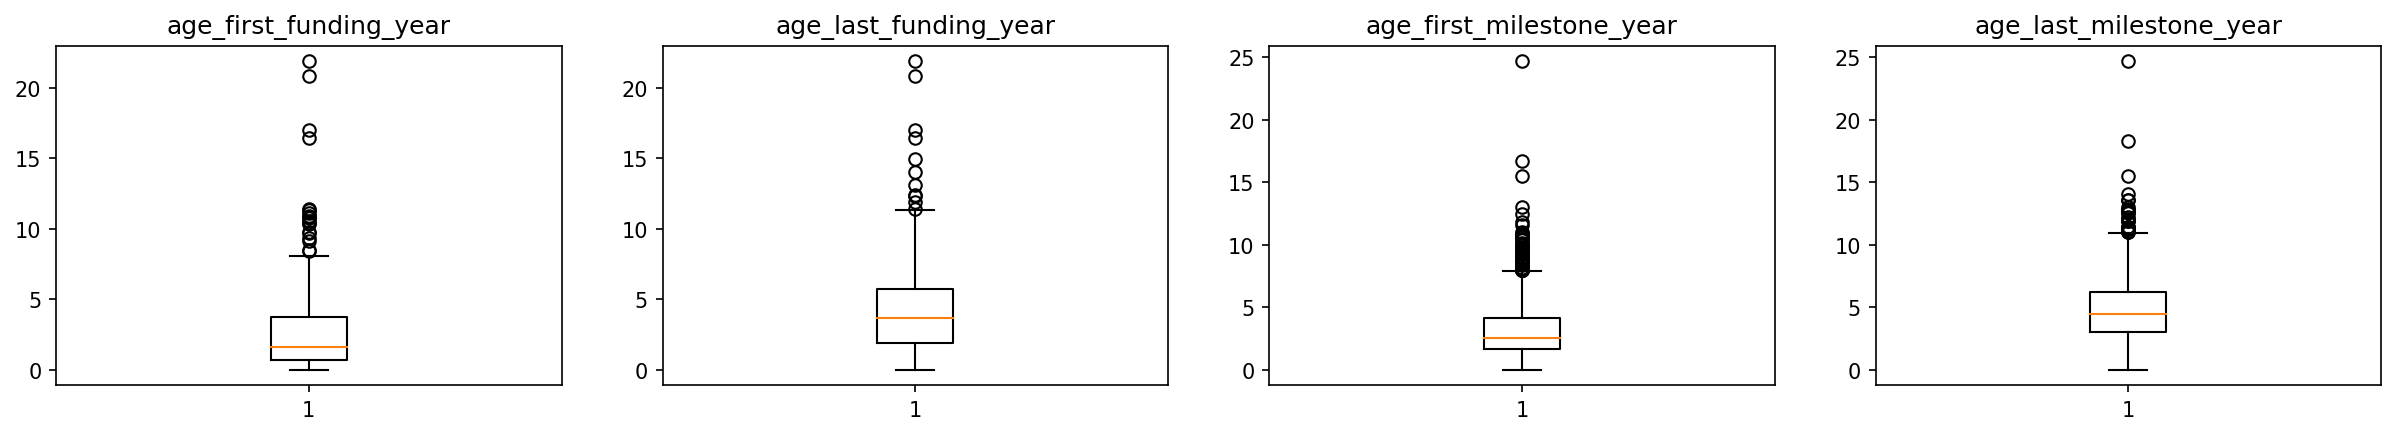

In [35]:

variable=["age_first_funding_year","age_last_funding_year","age_first_milestone_year","age_last_milestone_year"]

plt.figure(figsize=(20,3),dpi=150)
for i in range(len(variable)):
    plt.subplot(1,4,i+1)
    plt.title("{}". format(variable[i]))
    plt.boxplot(startup_df[variable[i]]);

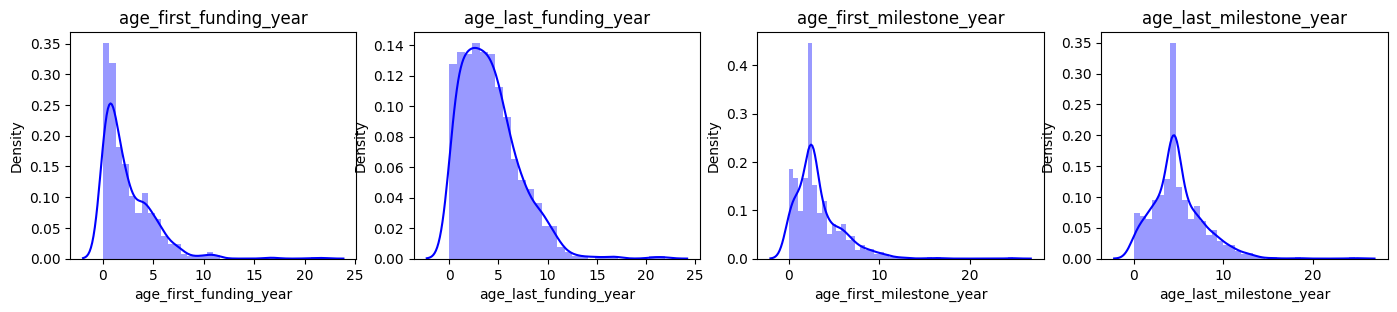

In [36]:
variable=["age_first_funding_year","age_last_funding_year","age_first_milestone_year","age_last_milestone_year"]

plt.figure(figsize=(17,3),dpi=100)
for i in range(len(variable)):
    plt.subplot(1,4,i+1)
    plt.title("{}". format(variable[i]))
    sns.distplot(startup_df[variable[i]], color="blue");

Split the Data

In [37]:
X = startup_df[['relationships', 'milestones', 'is_top500', 'has_roundB', 'funding_rounds', 'age_last_milestone_year',
               'avg_participants', 'has_roundA', 'has_roundC', 'has_roundD', 'age_first_milestone_year', 'is_MA', 
               'is_CA', 'is_enterprise', 'age_last_funding_year', 'is_NY', 'latitude', 'is_advertising', 'is_advertising', 
               'funding_total_usd', 'is_software', 'is_mobile', 'is_consulting', 'is_biotech', 'is_biotech', 'is_web',
               'is_gamesvideo', 'longitude', 'is_othercategory', 'is_TX', 'has_VC', 'is_ecommerce', 'has_angel', 
               'age_first_funding_year', 'is_otherstate']]

In [38]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
scaled_data = scale.fit_transform(X) 

In [39]:
y = startup_df['status']

Scaling the data

SPLITTING THE DATA

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [41]:
print("The Shape of the X Train :", X_train.shape)
print("The Shape of the X test :", X_test.shape)
print("The Shape of the y Train :", y_train.shape)
print("The Shape of the y test :", y_test.shape)

The Shape of the X Train : (672, 35)
The Shape of the X test : (168, 35)
The Shape of the y Train : (672,)
The Shape of the y test : (168,)


Modelling

In [42]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_curve, auc,cohen_kappa_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

SVC

In [43]:
svc = SVC(C=3,degree=3)
svc.fit(X,y)
y_pred_sv = svc.predict(X_test)

SAVING THE MODEL AND LOADING THE  SVM MODEL

In [44]:
Pkl_Filename = "Pickle_svc_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(svc, file)

In [45]:
with open(Pkl_Filename, 'rb') as file:  
    Pickled_svc_Model = pickle.load(file)

Pickled_svc_Model

SVC(C=3)

In [46]:
score = Pickled_svc_Model.score(X_train, y_train) 
print("Accuracy_score:",score)

Accuracy_score: 0.6458333333333334


In [47]:
print("Training Accuracy :", svc.score(X_train, y_train))
print("Testing Accuracy :", svc.score(X_test, y_test))

Training Accuracy : 0.6458333333333334
Testing Accuracy : 0.7083333333333334


In [48]:
print("Accuracy:",accuracy_score(y_test, y_pred_sv))

Accuracy: 0.7083333333333334


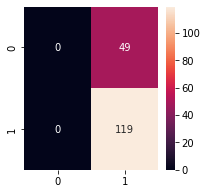

In [49]:
conf_m = confusion_matrix(y_test, y_pred_sv)
plt.rcParams['figure.figsize'] = (4, 4)
sns.heatmap(conf_m, annot = True,fmt = '.8g')
plt.show()

In [50]:
class_r = classification_report(y_test, y_pred_sv)
print(class_r)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.71      1.00      0.83       119

    accuracy                           0.71       168
   macro avg       0.35      0.50      0.41       168
weighted avg       0.50      0.71      0.59       168



In [51]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_sv)
roc = auc(false_positive_rate, true_positive_rate)
print("roc_auc",roc)

roc_auc 0.5


In [52]:
from sklearn.metrics import precision_score
print(f"Precision Score: {precision_score(y_test, y_pred_sv)}")

Precision Score: 0.7083333333333334


In [53]:
from sklearn.metrics import recall_score
print(f"Recall Score : {recall_score(y_test, y_pred_sv)}")

Recall Score : 1.0


In [54]:
from sklearn.metrics import f1_score
print(f"F1 Score : {f1_score(y_test, y_pred_sv)}")

F1 Score : 0.8292682926829268


In [55]:
print(f"Cohen_kappa score: {cohen_kappa_score(y_test, y_pred_sv)}")

Cohen_kappa score: 0.0


Random Forest

In [56]:
random_f = RandomForestClassifier(bootstrap=False, max_depth=15, min_samples_leaf=15, min_samples_split=8,
                       n_estimators=1000,criterion='entropy')  
random_f.fit(X,y)
y_pred_rf = random_f.predict(X_test)


SAVED AND LOADED THE RANDOM FOREST MODEL

In [57]:
Pkl_Filename = "Pickle_rf_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(random_f, file)

In [58]:
with open(Pkl_Filename, 'rb') as file:  
    Pickled_random_f_Model = pickle.load(file)

Pickled_random_f_Model
score = Pickled_random_f_Model.score(X_train, y_train) 
print("Accuracy_score:",score)

Accuracy_score: 0.8452380952380952


In [59]:
print("Training Accuracy :", random_f.score(X_train, y_train))
print("Testing Accuracy :", random_f.score(X_test, y_test))

Training Accuracy : 0.8452380952380952
Testing Accuracy : 0.8690476190476191


In [60]:
random_f_1 = RandomForestClassifier(bootstrap=False, max_depth=15, min_samples_leaf=10, min_samples_split=10,
                       n_estimators=100,criterion='gini')  
random_f_1.fit(X,y)
y_pred_rf = random_f_1.predict(X_test)

print("Training Accuracy :", random_f_1.score(X_train, y_train))
print("Testing Accuracy :", random_f_1.score(X_test, y_test))

Training Accuracy : 0.8660714285714286
Testing Accuracy : 0.8869047619047619


In [61]:
print("Accuracy:",accuracy_score(y_test, y_pred_rf))

Accuracy: 0.8869047619047619


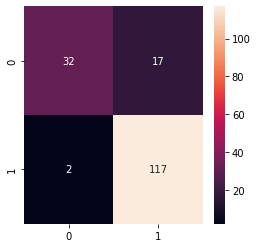

In [63]:
conf_m = confusion_matrix(y_test, y_pred_rf)
plt.rcParams['figure.figsize'] = (4, 4)
sns.heatmap(conf_m, annot = True, fmt = '.8g')
plt.show()

In [64]:
class_r = classification_report(y_test, y_pred_rf)
print(class_r)

              precision    recall  f1-score   support

           0       0.94      0.65      0.77        49
           1       0.87      0.98      0.92       119

    accuracy                           0.89       168
   macro avg       0.91      0.82      0.85       168
weighted avg       0.89      0.89      0.88       168



In [65]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_rf)
roc = auc(false_positive_rate, true_positive_rate)
print("roc_auc",roc)

roc_auc 0.8181272509003602


In [66]:
from sklearn.metrics import precision_score
print(f"Precision Score: {precision_score(y_test, y_pred_rf)}")

Precision Score: 0.8731343283582089


In [67]:
from sklearn.metrics import recall_score
print(f"Recall Score : {recall_score(y_test, y_pred_rf)}")

Recall Score : 0.9831932773109243


In [68]:
from sklearn.metrics import f1_score
print(f"F1 Score : {f1_score(y_test, y_pred_rf)}")

F1 Score : 0.924901185770751


In [69]:
print(f"Cohen_kappa score: {cohen_kappa_score(y_test, y_pred_rf)}")

Cohen_kappa score: 0.6992084432717678


LOGISTIC REGRESSION

In [70]:
lr_model=  LogisticRegression(solver='liblinear')
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

SAVING AND LOADING THE LOGISTIC REGRESSION MODEL

In [71]:
Pkl_Filename = "Pickle_LR_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(lr_model, file)

In [72]:
with open(Pkl_Filename, 'rb') as file:  
    Pickled_lr_model_Model = pickle.load(file)

Pickled_lr_model_Model
score = Pickled_lr_model_Model.score(X_train, y_train) 
print("Accuracy_score:",score)

Accuracy_score: 0.6443452380952381


In [73]:
print("Training Accuracy :", lr_model.score(X_train, y_train))
print("Testing Accuracy :", lr_model.score(X_test, y_test))

Training Accuracy : 0.6443452380952381
Testing Accuracy : 0.7083333333333334


In [74]:
print("Accuracy:",accuracy_score(y_test, y_pred_lr))

Accuracy: 0.7083333333333334


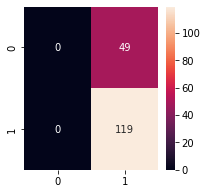

In [75]:
conf_m = confusion_matrix(y_test, y_pred_lr)
plt.rcParams['figure.figsize'] = (4, 4)
sns.heatmap(conf_m, annot = True, fmt = '.8g')
plt.show()

In [76]:
class_r = classification_report(y_test, y_pred_lr)
print(class_r)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.71      1.00      0.83       119

    accuracy                           0.71       168
   macro avg       0.35      0.50      0.41       168
weighted avg       0.50      0.71      0.59       168



In [77]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_lr)
roc = auc(false_positive_rate, true_positive_rate)
print("roc_auc",roc)

roc_auc 0.5


In [78]:
from sklearn.metrics import precision_score
print(f"Precision Score: {precision_score(y_test, y_pred_lr)}")

Precision Score: 0.7083333333333334


In [79]:
from sklearn.metrics import recall_score
print(f"Recall Score : {recall_score(y_test, y_pred_lr)}")

Recall Score : 1.0


In [80]:
from sklearn.metrics import f1_score
print(f"F1 Score : {f1_score(y_test, y_pred_lr)}")

F1 Score : 0.8292682926829268


In [81]:
print(f"Cohen_kappa score: {cohen_kappa_score(y_test, y_pred_lr)}")

Cohen_kappa score: 0.0


THE RESULTS SHOW THE SVM AND LOGISTIC REGRESSION ARE SAME

DECSISON TREE CLASSIFIER

In [82]:
from sklearn.tree import DecisionTreeClassifier
clf_dcst = DecisionTreeClassifier()
clf_dcst = clf_dcst.fit(X_train,y_train)

SAVING AND LOADING THE DT MODEL

In [83]:
Pkl_Filename = "Pickle_clf_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(clf_dcst, file)

In [84]:
with open(Pkl_Filename, 'rb') as file:  
    Pickled_clf_Model = pickle.load(file)

Pickled_clf_Model
score = Pickled_clf_Model.score(X_train, y_train) 
print("Accuracy_score:",score)

Accuracy_score: 1.0


In [86]:

print("Training Accuracy :", clf_dcst.score(X_train, y_train))
print("Testing Accuracy :",clf_dcst.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.7202380952380952


In [89]:
y_pred_clf = clf_dcst.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred_clf))

Accuracy: 0.7202380952380952


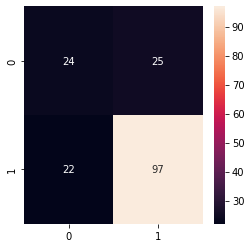

In [91]:
conf_m_dct = confusion_matrix(y_test, y_pred_clf)
plt.rcParams['figure.figsize'] = (4, 4)
sns.heatmap(conf_m_dct, annot = True, fmt = '.8g')
plt.show()

In [92]:
class_r_dsct = classification_report(y_test, y_pred_clf)
print(class_r_dsct)

              precision    recall  f1-score   support

           0       0.52      0.49      0.51        49
           1       0.80      0.82      0.80       119

    accuracy                           0.72       168
   macro avg       0.66      0.65      0.66       168
weighted avg       0.72      0.72      0.72       168



In [93]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_clf)
roc_val = auc(false_positive_rate, true_positive_rate)
print("roc_auc",roc)

roc_auc 0.5


In [94]:
from sklearn.metrics import precision_score
print(f"Precision Score for DT: {precision_score(y_test, y_pred_clf)}")

Precision Score for DT: 0.7950819672131147


In [95]:
from sklearn.metrics import recall_score
print(f"Recall Score for DT: {recall_score(y_test, y_pred_clf)}")

Recall Score for DT: 0.8151260504201681


In [96]:
from sklearn.metrics import f1_score
print(f"F1 Score for DT: {f1_score(y_test, y_pred_clf)}")

F1 Score for DT: 0.8049792531120331


In [97]:
print(f"Cohen_kappa score: {cohen_kappa_score(y_test, y_pred_clf)}")

Cohen_kappa score: 0.3105134474327629


In [98]:

from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier


Gradient Boosting Classifier


In [99]:
cls_gbc = GradientBoostingClassifier(random_state=7)
cls_gbc.fit(X_train,y_train)
y_pred_gbs_val = cls_gbc.predict(X_test)

SAVING AND LOADING THE GRADIENT BOOSTING CLASSIFIER MODEL

In [100]:
Pkl_Filename = "Pickle_cls_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(cls_gbc, file)

In [101]:
with open(Pkl_Filename, 'rb') as file:  
    Pickled_cls_Model = pickle.load(file)

Pickled_cls_Model
score = Pickled_cls_Model.score(X_train, y_train) 
print("Accuracy_score:",score)

Accuracy_score: 0.9315476190476191


In [102]:
print("Training Accuracy :", cls_gbc.score(X_train, y_train))
print("Testing Accuracy :",cls_gbc.score(X_test, y_test))

Training Accuracy : 0.9315476190476191
Testing Accuracy : 0.7797619047619048


In [104]:
y_pred_gbs_val = cls_gbc.predict(X_test)
print(accuracy_score(y_test,y_pred_gbs_val))
print(confusion_matrix(y_test,y_pred_gbs_val))
print(classification_report(y_test,y_pred_gbs_val))

0.7797619047619048
[[ 24  25]
 [ 12 107]]
              precision    recall  f1-score   support

           0       0.67      0.49      0.56        49
           1       0.81      0.90      0.85       119

    accuracy                           0.78       168
   macro avg       0.74      0.69      0.71       168
weighted avg       0.77      0.78      0.77       168



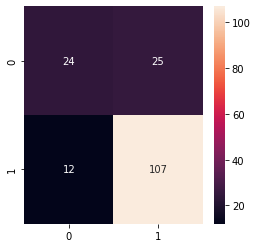

In [106]:
conf_m_gb = confusion_matrix(y_test, y_pred_gbs_val)
plt.rcParams['figure.figsize'] = (4, 4)
sns.heatmap(conf_m_gb, annot = True, fmt = '.8g')
plt.show()

In [107]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_gbs_val)
roc = auc(false_positive_rate, true_positive_rate)
print("roc_auc",roc)

roc_auc 0.6944777911164466


In [108]:
from sklearn.metrics import precision_score
print(f"Precision Score for GBT: {precision_score(y_test, y_pred_gbs_val)}")

Precision Score for GBT: 0.8106060606060606


In [109]:
from sklearn.metrics import recall_score
print(f"Recall Score for GBT: {recall_score(y_test, y_pred_gbs_val)}")

Recall Score for GBT: 0.8991596638655462


In [110]:
from sklearn.metrics import f1_score
print(f"F1 Score for GBT : {f1_score(y_test, y_pred_gbs_val)}")

F1 Score for GBT : 0.852589641434263


In [111]:
print(f"Cohen_kappa score: {cohen_kappa_score(y_test, y_pred_gbs_val)}")

Cohen_kappa score: 0.421875


KNN

In [112]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=2)

knn_model.fit(X_train, y_train)
prediction_knn = knn_model.predict(X_test)

In [113]:
Pkl_Filename = "Pickle_knn_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(knn_model, file)

In [118]:
with open(Pkl_Filename, 'rb') as file:  
    Pickled_knn_Model = pickle.load(file)

Pickled_knn_Model
score = Pickled_knn_Model.score(X_train, y_train) 
print("Accuracy_score:",score)

Accuracy_score: 0.8020833333333334


In [119]:
print("Training Accuracy :", knn_model.score(X_train, y_train))
print("Testing Accuracy :",knn_model.score(X_test, y_test))
prediction_knn_val = knn_model.predict(X_test)

Training Accuracy : 0.8020833333333334
Testing Accuracy : 0.6369047619047619


In [120]:
print(accuracy_score(y_test,prediction_knn_val))
print(confusion_matrix(y_test,prediction_knn_val))
print(classification_report(y_test,prediction_knn_val))

0.6369047619047619
[[34 15]
 [46 73]]
              precision    recall  f1-score   support

           0       0.42      0.69      0.53        49
           1       0.83      0.61      0.71       119

    accuracy                           0.64       168
   macro avg       0.63      0.65      0.62       168
weighted avg       0.71      0.64      0.65       168



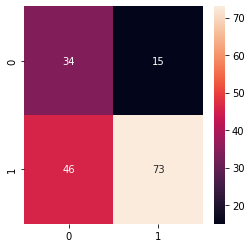

In [121]:
conf_m_knn = confusion_matrix(y_test, prediction_knn_val)
plt.rcParams['figure.figsize'] = (4, 4)
sns.heatmap(conf_m_knn, annot = True, fmt = '.8g')
plt.show()

In [122]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,prediction_knn_val)
roc = auc(false_positive_rate, true_positive_rate)
print("roc_auc",roc)

roc_auc 0.6536614645858344


In [123]:
from sklearn.metrics import precision_score
print(f"Precision Score: {precision_score(y_test, prediction_knn_val)}")

Precision Score: 0.8295454545454546


In [124]:
from sklearn.metrics import recall_score
print(f"Recall Score : {recall_score(y_test, prediction_knn_val)}")

Recall Score : 0.6134453781512605


In [125]:
from sklearn.metrics import f1_score
print(f"F1 Score : {f1_score(y_test, prediction_knn_val)}")

F1 Score : 0.7053140096618358


In [126]:
print(f"Cohen_kappa score: {cohen_kappa_score(y_test, prediction_knn_val)}")

Cohen_kappa score: 0.2591093117408907


Ensemble Modelling

In [127]:

from sklearn.metrics import log_loss
 
from xgboost import XGBClassifier

# for voting classifier
from sklearn.ensemble import VotingClassifier
 


model_lr = LogisticRegression()
model_dc = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
 

ensemble_model = VotingClassifier(
    estimators=[('lr', model_lr), ('xgb', model_dc), ('rf', model_rf)], voting='hard')
ensemble_model.fit(X_train, y_train)

pred_final_val = ensemble_model.predict(X_test)
 

print(log_loss(y_test, pred_final_val))

7.812485065056618


In [128]:
from sklearn.metrics import f1_score
print(f"F1 Score : {f1_score(y_test, pred_final_val)}")

F1 Score : 0.8538461538461538


In [129]:
print(f"Cohen_kappa score: {cohen_kappa_score(y_test, pred_final_val)}")

Cohen_kappa score: 0.36929460580912865
